# Process Visualization

The process begins by creating a directed graph that represents relationships between different units. Each unit is represented as a node, and the connections between these units are represented as directed edges, indicating how one unit feeds into another. 

The graph is then visualized, showing the nodes and the direction of the edges. This visual representation helps to illustrate the flow from upstream units to downstream units clearly, making it easy to understand the relationships and interactions within the system.

In addition to the visual output, a summary is generated that lists the structure of the graph and the types of units associated with each node. This summary provides a clear view of which units are connected, in what direction they flow, and their classifications. 

Overall, the process constructs a directed graph, visualizes it for clarity, and provides descriptive information that enhances understanding of the relationships and roles of the different units in the system.

/home/gathu/Documents/CLASSES/data science/Data-Science-with-python/goodenvironment/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/gathu/Documents/CLASSES/data science/Data-Science-with-python/goodenvironment/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


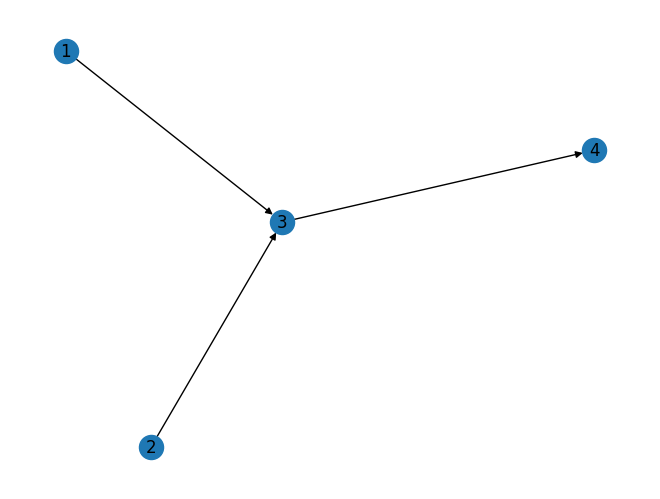

Graph structure (Upstream -> Downstream):
(1, 3)
(3, 4)
(2, 3)

Unit types:
Unit 1 is of type C1
Unit 3 is of type C3
Unit 2 is of type C2
Unit 4 is of type C3


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
edges = [(1, 3), (2, 3), (3, 4)]  # Corrected upstream-downstream relationships
g = nx.DiGraph(edges)

# Define unit types (C1, C2, C3) for the nodes
unit_types = {1: "C1", 2: "C2", 3: "C3", 4: "C3"}

# Store the manufacturing (X) and transportation (Y) values for each unit type
X = {"C1": 4, "C2": 3, "C3": 3}
Y = {"C1": 2, "C2": 2, "C3": 1}

# Draw the graph
pos = nx.spring_layout(g)  # Positioning of nodes
nx.draw(g, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

# Display the graph
plt.show()

# Function to print out the current graph structure and unit types
def print_graph_info(g):
    print("Graph structure (Upstream -> Downstream):")
    for edge in g.edges():
        print(edge)
    print("\nUnit types:")
    for node in g.nodes():
        print(f"Unit {node} is of type {unit_types[node]}")

# Call the function to print the graph info
print_graph_info(g)


## Simulation 
This Python simulation models a production process where multiple units manufacture and transport items across multiple cycles. Each unit is represented by the `Unit` class, which tracks inventory, handles the manufacturing of items, and transports a specified amount of units downstream, maintaining proportional source ratios. The simulation includes two main phases: manufacturing and transportation.

In the **manufacturing phase**, each unit produces a predefined number of items based on input data, which is then added to its inventory. After manufacturing, the inventory is reported for each unit, and numerical values are extracted and stored. The **transportation phase** then moves the manufactured units downstream, based on a specified transport amount, while maintaining the ratio of the sources that contributed to the inventory. The updated inventory is again reported, and numerical values are extracted after transportation.

The simulation runs over a set number of cycles, with each cycle following the same steps of manufacturing, transportation, and value extraction. The relationships between units are defined so that units can send their produced goods downstream, and units can have upstream suppliers. In this example, four units are used, and random values are provided for both production and transportation across three cycles. At the end of the simulation, the numerical values captured after each phase are printed. This allows for a detailed view of how the inventory and transportation change over time across units.

In [3]:
import re

class Unit:
    def __init__(self, unit_id, unit_type):
        self.unit_id = unit_id
        self.unit_type = unit_type
        self.inventory = {}  # Dictionary to track inventory by source
        self.downstream = None
        self.upstreams = []

    def manufacture(self, units_produced):
        """Manufacture a specified number of units and add to inventory."""
        if self.unit_id not in self.inventory:
            self.inventory[self.unit_id] = 0
        self.inventory[self.unit_id] += units_produced

    def transport(self, units_transported):
        """Transport a specified number of units downstream, maintaining source ratios."""
        total_inventory = sum(self.inventory.values())
        if total_inventory >= units_transported:
            # Calculate the transport ratio
            transport_ratio = units_transported / total_inventory
            transported = {}
            for source, amount in self.inventory.items():
                transported_amount = amount * transport_ratio
                transported[source] = transported_amount
                self.inventory[source] -= transported_amount

            # Send transported products to downstream
            if self.downstream:
                for source, amount in transported.items():
                    if source not in self.downstream.inventory:
                        self.downstream.inventory[source] = 0
                    self.downstream.inventory[source] += amount

    def report_inventory(self):
        """Report the total inventory and its sources."""
        total = sum(self.inventory.values())
        print(f"Unit {self.unit_id} (Type {self.unit_type}) Inventory:")
        print(f"Total: {total:.2f}")
        for source, amount in self.inventory.items():
            print(f"  From Unit {source}: {amount:.2f}")

    def set_downstream(self, downstream_unit):
        self.downstream = downstream_unit

    def add_upstream(self, upstream_unit):
        self.upstreams.append(upstream_unit)

def extract_numerical_values(unit):
    """Extract numerical values from a unit's inventory."""
    return [value for key, value in unit.inventory.items() if re.match(r'^[0-9]*\.?[0-9]+$', str(value))]

def simulate_production_process(units, cycles, production_values, transportation_values):
    all_numerical_values = []  # To store numerical values for each cycle

    for cycle in range(cycles):
        print(f"\n--- Cycle {cycle + 1} ---")
        
        # Manufacturing phase
        for i, unit in enumerate(units):
            unit.manufacture(production_values[cycle][i])
        print("After Manufacturing:")
        for unit in units:
            unit.report_inventory()
        
        # Extract numerical values after manufacturing
        numerical_values_after_manufacturing = [extract_numerical_values(unit) for unit in units]
        all_numerical_values.append(numerical_values_after_manufacturing)

        # Transportation phase
        for i, unit in enumerate(reversed(units)):  # Start from downstream units
            unit.transport(transportation_values[cycle][len(units) - 1 - i])
        print("\nAfter Transportation:")
        for unit in units:
            unit.report_inventory()
        
        # Extract numerical values after transportation
        numerical_values_after_transportation = [extract_numerical_values(unit) for unit in units]
        all_numerical_values.append(numerical_values_after_transportation)

    return all_numerical_values

# Example usage
unitA = Unit("A", "C1")
unitB = Unit("B", "C2")
unitC = Unit("C", "C3")
unitD = Unit("D", "C3")

unitA.set_downstream(unitC)
unitB.set_downstream(unitC)
unitC.add_upstream(unitB)
unitC.add_upstream(unitB)
unitD.add_upstream(unitC)

units = [unitA, unitB, unitC, unitD]

# Define production and transportation values for each cycle
production_values = [
    [4, 3, 3, 3],  # Production for Cycle 1
    [6, 4, 5, 5],  # Production for Cycle 2
    [6, 4, 5, 5]   # Production for Cycle 3
]

transportation_values = [
    [2, 2, 1, 1],  # Transportation for Cycle 1
    [3, 3, 3, 3],  # Transportation for Cycle 2
    [3, 3, 3, 3]   # Transportation for Cycle 3
]

# Run the simulation and capture numerical values
numerical_x_values = simulate_production_process(units, 3, production_values, transportation_values)

# Print numerical values captured during the simulation
# print("\nNumerical Values Captured:")
# for cycle_values in numerical_x_values:
#     print(cycle_values)



--- Cycle 1 ---
After Manufacturing:
Unit A (Type C1) Inventory:
Total: 4.00
  From Unit A: 4.00
Unit B (Type C2) Inventory:
Total: 3.00
  From Unit B: 3.00
Unit C (Type C3) Inventory:
Total: 3.00
  From Unit C: 3.00
Unit D (Type C3) Inventory:
Total: 3.00
  From Unit D: 3.00

After Transportation:
Unit A (Type C1) Inventory:
Total: 2.00
  From Unit A: 2.00
Unit B (Type C2) Inventory:
Total: 1.00
  From Unit B: 1.00
Unit C (Type C3) Inventory:
Total: 6.00
  From Unit C: 2.00
  From Unit B: 2.00
  From Unit A: 2.00
Unit D (Type C3) Inventory:
Total: 2.00
  From Unit D: 2.00

--- Cycle 2 ---
After Manufacturing:
Unit A (Type C1) Inventory:
Total: 8.00
  From Unit A: 8.00
Unit B (Type C2) Inventory:
Total: 5.00
  From Unit B: 5.00
Unit C (Type C3) Inventory:
Total: 11.00
  From Unit C: 7.00
  From Unit B: 2.00
  From Unit A: 2.00
Unit D (Type C3) Inventory:
Total: 7.00
  From Unit D: 7.00

After Transportation:
Unit A (Type C1) Inventory:
Total: 5.00
  From Unit A: 5.00
Unit B (Type C2) 


## Discussion 

The simulation results illustrate the inventory management process for four units over three production cycles, each consisting of manufacturing and transportation phases. 

In **Cycle 1**, after manufacturing, Unit A produces 4 units, Unit B produces 3 units, and Units C and D each produce 3 units. After transportation, Unit A sends out 2 units, leaving 2 in its inventory, while Unit B transports 2 units, leaving it with 1. Unit C, which receives inputs from A and B, ends with a total of 6 units in its inventory, and Unit D transports 1 unit, reducing its stock to 2.

In **Cycle 2**, Unit A produces 6 more units, bringing its inventory to 8. Unit B produces 4 units, bringing its stock to 5, while Unit C’s inventory rises to 11 after receiving inputs from the upstream units. Unit D produces 5 units, resulting in a total of 7 units. After transportation, Unit A transports 3 units, leaving 5, and Unit B transports 3, leaving 2. Unit C receives additional inputs, increasing its inventory to 14, while Unit D transports 3 units, leaving it with 4.

In **Cycle 3**, Unit A produces 6 units, bringing its stock to 11, and Unit B adds 4 units, increasing its inventory to 6. Unit C’s inventory rises to 19 due to upstream contributions, and Unit D produces 5 units, increasing its inventory to 9. After transportation, Unit A sends out 3 units, leaving 8, while Unit B sends out 3 units, leaving it with 3. Unit C's inventory grows to 22, and Unit D’s inventory decreases to 6 after transportation.

